In [2]:
import pandas as pd
import numpy as np


data = pd.read_csv('Table1.csv')
data=data.dropna()  
data

,year,name,index,other.method.index
0,2012,BLASR,BWT-FM,0
1,2009,Bowtie,BWT-FM,0
2,2012,Bowtie2,BWT-FM,0
3,2012,BRAT-BW,BWT-FM,0
4,2010,BS-Seeker,BWT-FM,Bowtie
5,2013,BS-Seeker2,BWT-FM,Bowtie2
6,2009,BWA,BWT-FM,0
7,2013,BWA-MEM,BWT-FM,0
8,2014,BWA-PSSM,BWT-FM,0
9,2010,BWA-SW,BWT-FM,0


In [3]:
index = data.groupby(['index',]).size()
index.head()

index
BWT-FM          23
BWT-ST           1
hash.table      57
suffix.array     7
dtype: int64

In [4]:
class my_colors: 
    red = (1.0,0.2,0.1)
    orange = (1.0,0.6,0.2)
    green = (0.3,0.9,0.3)
    blue = (0.3,0.7,1.0)

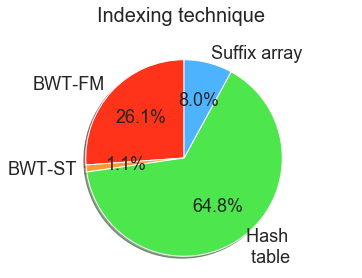

In [5]:
import pylab as pl
import matplotlib as mpl
mpl.rcParams['font.size'] = 18
labels = ['BWT-FM', 'BWT-ST', 'Hash \n table', 'Suffix array']
sizes = [index[0], index[1], index[2],index[3]]
values = [my_colors.red, my_colors.orange, my_colors.green,my_colors.blue]
fig1, ax1 = pl.subplots()

ax1.set_title("Indexing technique \n", fontsize=20)
patches, texts, autotexts= ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = values)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
texts[0].set_fontsize(18)
texts[1].set_fontsize(18)
texts[2].set_fontsize(18)
pl.show()

In [6]:
data_year = data.groupby(['year', 'index']).agg('count')
data_year.head()


columns=list(set(data['year'].tolist()))
columns.sort()



df = pd.DataFrame(index=['hash.table','suffix.array','BWT-FM','BWT-ST'], columns=columns,dtype=int)


    

for i in ['hash.table','suffix.array','BWT-FM','BWT-ST']:
    for j in columns:
       df[j][i]=0




for index, row in data.iterrows():
   df[row['year']][row['index']]+=1

df=df.transpose()
df['hash.table'] = df['hash.table'].cumsum()
df['suffix.array'] = df['suffix.array'].cumsum()
df['BWT-FM'] = df['BWT-FM'].cumsum()
df['BWT-ST'] = df['BWT-ST'].cumsum()



df



,hash.table,suffix.array,BWT-FM,BWT-ST
2001,1.0,0.0,0.0,0.0
2002,2.0,0.0,0.0,0.0
2003,3.0,0.0,0.0,0.0
2005,5.0,0.0,0.0,0.0
2008,11.0,1.0,1.0,0.0
2009,24.0,2.0,5.0,0.0
2010,31.0,3.0,8.0,0.0
2011,35.0,4.0,9.0,0.0
2012,42.0,4.0,13.0,1.0
2013,45.0,6.0,17.0,1.0


In [7]:
import seaborn as sns
print(sns.__version__)

0.9.0


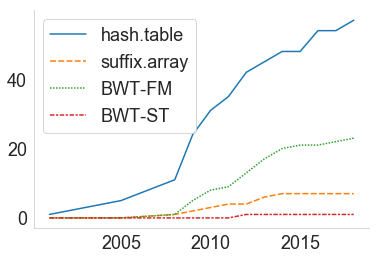

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.lineplot(data=df)



sns.despine()
